In [1]:
%pip install pandas
%pip install scikit-learn
%pip install imblearn
%pip install matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Reading and Parsing JSON

In [2]:
import gzip
import shutil

# Specify the input and output file names (adjust file paths if needed)
input_file = '../data/dataset0.json.gz'  
output_file = '../data/dataset0.json'    

# Unzip the file
with gzip.open(input_file, 'rb') as f_in:
    with open(output_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("File unzipped successfully.")

File unzipped successfully.


In [3]:
import pandas as pd
import json

input_file = '../data/dataset0.json' 

data = []
with open(input_file, 'r') as file:
    for line in file:
        # Parse each line as a JSON object
        data.append(json.loads(line))

def flatten_json(data):
    rows = []

    for entry in data:
        for transcript_id, positions in entry.items():
            for position, sequences in positions.items():
                for sequence, features in sequences.items():
                    for feature_set in features:
                        row = {
                            'transcript_id': transcript_id,
                            'transcript_position': position,
                            'sequence': sequence,
                            '-1_dwelling_time': feature_set[0],
                            '-1_standard_dev': feature_set[1],
                            '-1_mean_current': feature_set[2],
                            '0_dwelling_time': feature_set[3],
                            '0_standard_dev': feature_set[4],
                            '0_mean_current': feature_set[5],
                            '+1_dwelling_time': feature_set[6],
                            '+1_standard_dev': feature_set[7],
                            '+1_mean_current': feature_set[8],
                        }
                        rows.append(row)
    return rows

# Flatten the data
flattened_data = flatten_json(data)

# Convert to a DataFrame
df = pd.DataFrame(flattened_data)

In [4]:
print(df.head())
print(df.info())

     transcript_id transcript_position sequence  -1_dwelling_time  \
0  ENST00000000233                 244  AAGACCA           0.00299   
1  ENST00000000233                 244  AAGACCA           0.00631   
2  ENST00000000233                 244  AAGACCA           0.00465   
3  ENST00000000233                 244  AAGACCA           0.00398   
4  ENST00000000233                 244  AAGACCA           0.00664   

   -1_standard_dev  -1_mean_current  0_dwelling_time  0_standard_dev  \
0             2.06            125.0          0.01770           10.40   
1             2.53            125.0          0.00844            4.67   
2             3.92            109.0          0.01360           12.00   
3             2.06            125.0          0.00830            5.01   
4             2.92            120.0          0.00266            3.94   

   0_mean_current  +1_dwelling_time  +1_standard_dev  +1_mean_current  
0           122.0           0.00930            10.90             84.1  
1       

In [12]:
# Export as csv
path = '../data/dataset0.csv'
df.to_csv(path, index=False)

# Load labels and features, perform aggregation

## Read in labels and features

In [13]:
import pandas as pd

labels = pd.read_csv('../data/data.info.labelled')

print(labels.info())  # To get summary information about the DataFrame
print(labels.head())  # Preview the first few rows of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121838 entries, 0 to 121837
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   gene_id              121838 non-null  object
 1   transcript_id        121838 non-null  object
 2   transcript_position  121838 non-null  int64 
 3   label                121838 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.7+ MB
None
           gene_id    transcript_id  transcript_position  label
0  ENSG00000004059  ENST00000000233                  244      0
1  ENSG00000004059  ENST00000000233                  261      0
2  ENSG00000004059  ENST00000000233                  316      0
3  ENSG00000004059  ENST00000000233                  332      0
4  ENSG00000004059  ENST00000000233                  368      0


In [14]:
features = pd.read_csv('../data/dataset0.csv')

print(features.info()) 
print(features.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11027106 entries, 0 to 11027105
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transcript_id        object 
 1   transcript_position  int64  
 2   sequence             object 
 3   -1_dwelling_time     float64
 4   -1_standard_dev      float64
 5   -1_mean_current      float64
 6   0_dwelling_time      float64
 7   0_standard_dev       float64
 8   0_mean_current       float64
 9   +1_dwelling_time     float64
 10  +1_standard_dev      float64
 11  +1_mean_current      float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1009.6+ MB
None
     transcript_id  transcript_position sequence  -1_dwelling_time  \
0  ENST00000000233                  244  AAGACCA           0.00299   
1  ENST00000000233                  244  AAGACCA           0.00631   
2  ENST00000000233                  244  AAGACCA           0.00465   
3  ENST00000000233                  244  AAGACCA           

## Aggregate and label features

In [15]:
def aggregate_by_transcript_position(features):

    features_agg = features.groupby(['transcript_id', 'transcript_position', 'sequence'])\
    [['-1_dwelling_time', '-1_standard_dev', '-1_mean_current',
      '0_dwelling_time', '0_standard_dev', '0_mean_current',
      '+1_dwelling_time', '+1_standard_dev', '+1_mean_current']]\
    .mean().reset_index()
    return features_agg

In [16]:
features_agg = aggregate_by_transcript_position(features)
print(features_agg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121838 entries, 0 to 121837
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   transcript_id        121838 non-null  object 
 1   transcript_position  121838 non-null  int64  
 2   sequence             121838 non-null  object 
 3   -1_dwelling_time     121838 non-null  float64
 4   -1_standard_dev      121838 non-null  float64
 5   -1_mean_current      121838 non-null  float64
 6   0_dwelling_time      121838 non-null  float64
 7   0_standard_dev       121838 non-null  float64
 8   0_mean_current       121838 non-null  float64
 9   +1_dwelling_time     121838 non-null  float64
 10  +1_standard_dev      121838 non-null  float64
 11  +1_mean_current      121838 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 11.2+ MB
None


In [17]:
def add_gene_and_label(features, labels):
    """
    Adds gene_id and label to features dataframe
    
    Inputs:
    - features: pd.DataFrame
      Dataframe with selected features after feature engineering. Dataframe must contain transcript_id and transcript_position
    - labels: pd.DataFrame
      Dataframe with gene_id, transcript_id, transcript_position, and label.

    Output:
    - pd.DataFrame
      Updated features dataframe with added columns: gene_id and label from labels.
    """
    features_labelled = pd.merge(features, labels, on=['transcript_id', 'transcript_position'], how='inner')
    
    return features_labelled


In [18]:
features_labelled = add_gene_and_label(features_agg, labels)
print(features_labelled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121838 entries, 0 to 121837
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   transcript_id        121838 non-null  object 
 1   transcript_position  121838 non-null  int64  
 2   sequence             121838 non-null  object 
 3   -1_dwelling_time     121838 non-null  float64
 4   -1_standard_dev      121838 non-null  float64
 5   -1_mean_current      121838 non-null  float64
 6   0_dwelling_time      121838 non-null  float64
 7   0_standard_dev       121838 non-null  float64
 8   0_mean_current       121838 non-null  float64
 9   +1_dwelling_time     121838 non-null  float64
 10  +1_standard_dev      121838 non-null  float64
 11  +1_mean_current      121838 non-null  float64
 12  gene_id              121838 non-null  object 
 13  label                121838 non-null  int64  
dtypes: float64(9), int64(2), object(3)
memory usage: 13.0+ MB
None


In [19]:
# features_labelled.to_csv('../data/features_labelled.csv',index=False)

# Train Test Split

In [20]:
def train_test_split_by_gene_id(features_labelled, features_columns):
    """
    Performs train test split based on gene_id. Returns X_train and X_test based on feature_columns
    
    Inputs:
    - features_labelled: pd.DataFrame
      Updated features dataframe with added columns: gene_id and label from labels.
      
    Output:
    - X_train: pd.DataFrame
    - X_test: pd.DataFrame
    - y_train: pd.DataFrame
    - y_test: pd.DataFrame
    """

    from sklearn.model_selection import train_test_split
    df = features_labelled

    # Get unique genes
    unique_genes = df['gene_id'].unique()
    
    # Perform the train-test split on genes
    genes_train, genes_test = train_test_split(unique_genes, test_size=0.2, random_state=42)
    
    # Split the dataset based on the gene split
    train_data = df[df['gene_id'].isin(genes_train)]
    test_data = df[df['gene_id'].isin(genes_test)]
    
    # Create the feature and target variables for training and testing
    id_train = train_data[['transcript_id','transcript_position']]
    X_train = train_data[features_columns]
    y_train = train_data['label']
    id_test = test_data[['transcript_id','transcript_position']]
    X_test = test_data[features_columns]
    y_test = test_data['label']
    
    # Output the shapes to verify the split
    print(f"Training Features Shape: {X_train.shape}")
    print(f"Test Features Shape: {X_test.shape}")
    print(f"Training Labels Shape: {y_train.shape}")
    print(f"Test Labels Shape: {y_test.shape}")
    return (X_train, X_test, y_train, y_test, id_train, id_test)

In [21]:
features_columns = [
        '-1_dwelling_time', '-1_standard_dev', '-1_mean_current',
        '0_dwelling_time', '0_standard_dev', '0_mean_current',
        '+1_dwelling_time', '+1_standard_dev', '+1_mean_current'
    ]
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split_by_gene_id(features_labelled, features_columns)

Training Features Shape: (96821, 9)
Test Features Shape: (25017, 9)
Training Labels Shape: (96821,)
Test Labels Shape: (25017,)


In [22]:
# Balancing Data

In [23]:
def balance_train_data(X_train,y_train):
    """
    Performs SMOTE on train data, oversampling positive class, to account for imbalanced dataset
    
    Inputs:
    - X_train: pd.DataFrame
    - Y_train: pd.DataFrame
      
    Output:
    - X_train_resampled: pd.DataFrame
    - y_train_resampled: pd.DataFrame with balanced classes, ie the same number of 0s and 1s
    """

    from imblearn.over_sampling import SMOTE
    print(f'Label distribution before resampling:')
    print(pd.Series(y_train).value_counts())
    
    smote = SMOTE(k_neighbors=5, random_state=42) 
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print(f'Label distribution after resampling:')
    print(pd.Series(y_train_resampled).value_counts())
    
    return X_train_resampled, y_train_resampled

In [24]:
X_train_resampled, y_train_resampled = balance_train_data(X_train,y_train)

Label distribution before resampling:
label
0    92400
1     4421
Name: count, dtype: int64
Label distribution after resampling:
label
0    92400
1    92400
Name: count, dtype: int64


In [25]:
# can remove?
# print(X_train.isnull().sum())
# print(X_train_resampled.isnull().sum())
# print(X_test.isnull().sum())

In [26]:
# Remove null value in X_test (and corresponding y_test value)
X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]
id_test_clean = id_test.loc[X_test_clean.index]

In [27]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression Model
def LR(X_train,y_train):
    classifier = LogisticRegression(max_iter=1000, verbose = 1,  random_state = 123, class_weight = 'balanced')
    classifier.fit(X_train, y_train)
    return classifier

In [28]:
# Predict the output of xtest using the trained models
def predict(classifier, id, X):
    y_pred = classifier.predict(X)
    y_prob = classifier.predict_proba(X)[:, 1] #Gives probability estimates for y=1

    y_out = pd.DataFrame({
        'prediction': y_pred,                  
        'probability': y_prob          
    })

    result = pd.concat((id.reset_index(drop=True), y_out.reset_index(drop=True)), axis=1)
    # print(result.head())
    return result

In [29]:
# Model evaluation
def evaluate(y_test, predict_df):
    y_pred = predict_df['prediction']
    y_prob = predict_df['probability']
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test,  y_pred)
    balancedaccuracy = balanced_accuracy_score(y_test,  y_pred)
    f1score = f1_score(y_test,  y_pred) #F1 is a good scoring metric for imbalanced data when more attention is needed on the positives
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) 
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob) # Computes ROC AUC score using probabilities of positive class
    pr_auc = auc(recall_vals
                 , precision_vals)

    print(f"Accuracy = {round(accuracy, ndigits=3)}")
    print(f"Balanced Accuracy = {round(balancedaccuracy, ndigits=3)}")
    print(f"f1 score = {round(f1score, ndigits=3)}")
    print(f"Precision = {round(precision, ndigits=3)}")
    print(f"Recall = {round(recall, ndigits=3)}")
    print(f"ROC AUC = {round(roc_auc, ndigits=3)}")
    print(f"PR AUC = {round(pr_auc, ndigits=3)}")

    # Plot confusion matrix
    plt.figure(figsize=(2,2))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.figure(figsize=(5,5))  # Increase the figure size to avoid overlap
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.show()

    # Plot Precision-Recall curve
    plt.plot(recall_vals, precision_vals, label='PR curve (AUC = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.71112D+04    |proj g|=  1.34931D+05

At iterate   50    f=  6.22172D+04    |proj g|=  3.02275D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     90    104      1     0     0   4.460D+01   6.063D+04
  F =   60633.586729569914     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Accuracy = 0.603
Balanced Accuracy = 0.652
f1 score = 0.13
Precision = 0.072
Recall = 0.705
ROC AUC = 0.714
PR AUC = 0.078


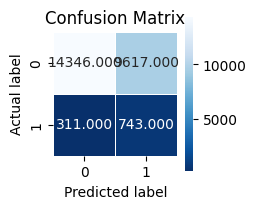

<Figure size 500x500 with 0 Axes>

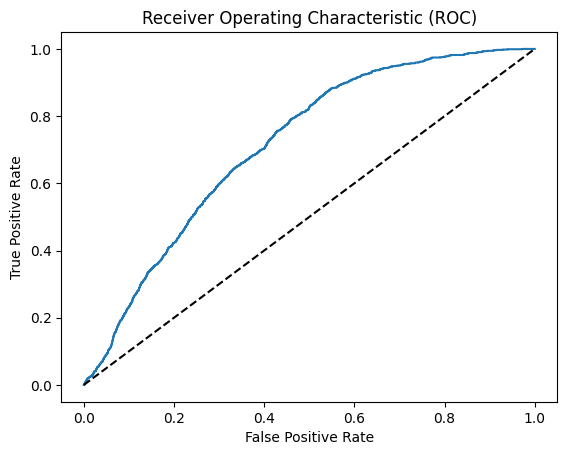

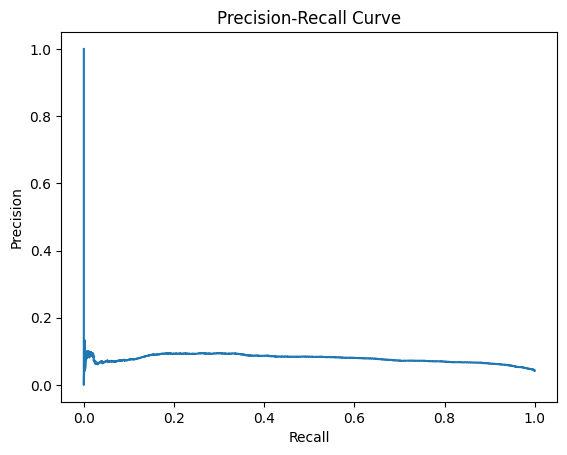

In [30]:
# ML workflow for Logistic Regression - without SMOTE
LR_classifier = LR(X_train, y_train)
result = predict(LR_classifier, id_test, X_test_clean)
evaluate(y_test_clean, result)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28094D+05    |proj g|=  2.57477D+05


 This problem is unconstrained.



At iterate   50    f=  1.17516D+05    |proj g|=  2.92319D+03

At iterate  100    f=  1.14791D+05    |proj g|=  1.35312D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10    104    122      1     0     0   7.593D+01   1.148D+05
  F =   114790.64187143079     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Accuracy = 0.614
Balanced Accuracy = 0.656
f1 score = 0.133
Precision = 0.073
Recall = 0.703
ROC AUC = 0.718
PR AUC = 0.082


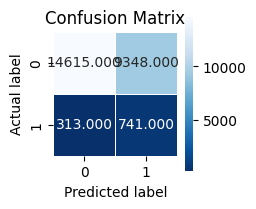

<Figure size 500x500 with 0 Axes>

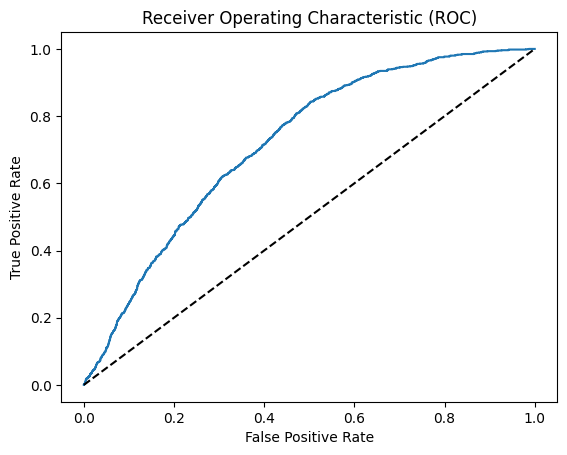

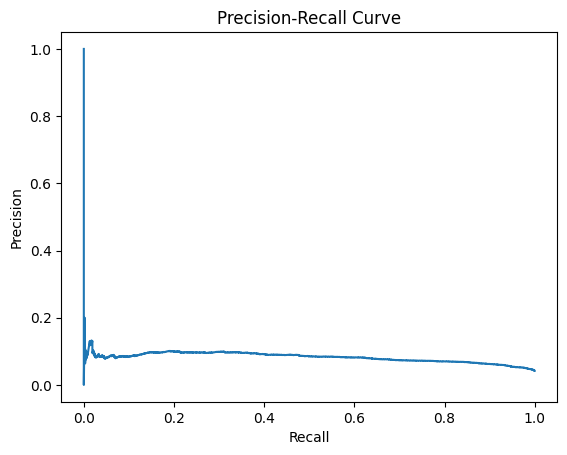

In [31]:
# ML workflow for Logistic Regression - with SMOTE
LR_classifier = LR(X_train_resampled, y_train_resampled)
result = predict(LR_classifier, id_test_clean, X_test_clean)
evaluate(y_test_clean, result)

result = result.sort_values(by='probability', ascending=False)
result = result.rename(columns={'probability': 'score'})
result = result[['transcript_id', 'transcript_position', 'score']]


# Predictions for dataset0

In [46]:
X_test_0 = features_agg[features_columns]
id_test_0 = features_agg[['transcript_id', 'transcript_position']]

In [47]:
result = predict(LR_classifier, id_test_0, X_test_0)

result = result.sort_values(by='probability', ascending=False)
result = result.rename(columns={'probability': 'score'})
result = result[['transcript_id', 'transcript_position', 'score']]


In [48]:
# Export results to CSV
output_csv_path = '../data/geneiuses_dataset0_1.csv'
result.to_csv(output_csv_path, index=False)

print(f"Results exported to {output_csv_path}")


Results exported to ../data/geneiuses_dataset0_1.csv


# Predictions for dataset1

In [33]:
import gzip
import shutil

# Specify the input and output file names (adjust file paths if needed)
input_file_1 = '../data/dataset1.json.gz'  
output_file_1 = '../data/dataset1.json'    

# Unzip the file
with gzip.open(input_file_1, 'rb') as f_in:
    with open(output_file_1, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("File unzipped successfully.")

File unzipped successfully.


In [34]:
import pandas as pd
import json

input_file_1 = '../data/dataset1.json' 

data_1 = []
with open(input_file_1, 'r') as file:
    for line in file:
        # Parse each line as a JSON object
        data_1.append(json.loads(line))

# Flatten the data
flattened_data_1 = flatten_json(data_1)

# Convert to a DataFrame
df_1 = pd.DataFrame(flattened_data_1)

In [35]:
# Export as csv
path = '../data/dataset1.csv'
df_1.to_csv(path, index=False)

In [36]:
features_1 = pd.read_csv('../data/dataset1.csv')
features_agg_1 = aggregate_by_transcript_position(features_1)
features_columns_1 = [
        '-1_dwelling_time', '-1_standard_dev', '-1_mean_current',
        '0_dwelling_time', '0_standard_dev', '0_mean_current',
        '+1_dwelling_time', '+1_standard_dev', '+1_mean_current'
    ]

X_test_1 = features_agg_1[features_columns_1]
id_test_1 = features_agg_1[['transcript_id', 'transcript_position']]

In [37]:
result_1 = predict(LR_classifier, id_test_1, X_test_1)
result_1 = result_1.sort_values(by='probability', ascending=False)
result_1 = result_1.rename(columns={'probability': 'score'})
result_1 = result_1[['transcript_id', 'transcript_position', 'score']]


In [38]:
# Export results to CSV
output_csv_path = '../data/geneiuses_dataset1_1.csv'
result_1.to_csv(output_csv_path, index=False)

print(f"Results exported to {output_csv_path}")


Results exported to ../data/geneiuses_dataset1_1.csv


# Predictions for dataset2

In [39]:
import gzip
import shutil

# Specify the input and output file names (adjust file paths if needed)
input_file_2 = '../data/dataset2.json.gz'  
output_file_2 = '../data/dataset2.json'    

# Unzip the file
with gzip.open(input_file_2, 'rb') as f_in:
    with open(output_file_2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("File unzipped successfully.")

File unzipped successfully.


In [40]:
import pandas as pd
import json

input_file_2 = '../data/dataset2.json' 

data_2 = []
with open(input_file_2, 'r') as file:
    for line in file:
        # Parse each line as a JSON object
        data_2.append(json.loads(line))

# Flatten the data
flattened_data_2 = flatten_json(data_2)

# Convert to a DataFrame
df_2 = pd.DataFrame(flattened_data_2)

In [41]:
# Export as csv
path = '../data/dataset2.csv'
df_2.to_csv(path, index=False)

In [42]:
features_2 = pd.read_csv('../data/dataset2.csv')
features_agg_2 = aggregate_by_transcript_position(features_2)
features_columns_2 = [
        '-1_dwelling_time', '-1_standard_dev', '-1_mean_current',
        '0_dwelling_time', '0_standard_dev', '0_mean_current',
        '+1_dwelling_time', '+1_standard_dev', '+1_mean_current'
    ]

X_test_2 = features_agg_2[features_columns_2]
id_test_2 = features_agg_2[['transcript_id', 'transcript_position']]


In [43]:
# ML workflow for Logistic Regression
result_2 = predict(LR_classifier, id_test_2, X_test_2)

In [44]:
result_2 = result_2.sort_values(by='probability', ascending=False)
result_2 = result_2.rename(columns={'probability': 'score'})
result_2 = result_2[['transcript_id', 'transcript_position', 'score']]


In [45]:
# Export results to CSV
output_csv_path = '../data/geneiuses_dataset2_1.csv'
result_2.to_csv(output_csv_path, index=False)

print(f"Results exported to {output_csv_path}")


Results exported to ../data/geneiuses_dataset2_1.csv
